# PyCaret Classification

*Ian Viotti, 2022*

---

In [1]:
import pandas as pd

## Getting data

In [2]:
skin_df = pd.read_csv('skin_damage_data.csv')
core_df = pd.read_csv('core_damage_data.csv')

In [3]:
damage_df = pd.concat([core_df, skin_df])

In [4]:
#cols = ['Type','0', '1', '2', '3', '4', 'UZ - N1 M1','UZ - N1 M2','UZ - N1 M3','UZ - N1 M4', 'UZ - N2 M1','UZ - N2 M2','UZ - N2 M3','UZ - N2 M4','UZ - N3 M1','UZ - N3 M2','UZ - N3 M3','UZ - N3 M4','UZ - N4 M1','UZ - N4 M2','UZ - N4 M3','UZ - N4 M4']
cols = ['Type','0', '1', '2', '3', '4']
damage_df = damage_df[cols]
damage_df = damage_df.fillna('Core')

In [5]:
data = damage_df.sample(frac=0.9, random_state=1)
data_unseen = damage_df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1651, 6)
Unseen Data For Predictions: (34, 6)


In [6]:
data

,Type,0,1,2,3,4
0,Core,209.60,349.00,827.50,1034.5,1169.9
1,Skin,209.57,350.54,835.33,1044.8,1179.2
2,Skin,210.22,351.16,835.81,1044.9,1180.0
3,Core,209.67,349.05,827.52,1034.6,1170.4
4,Interface,210.25,350.98,835.51,1044.2,1178.9
...,...,...,...,...,...,...
1646,Core,209.63,349.04,827.54,1034.5,1169.8
1647,Core,209.63,349.04,827.13,1034.5,1170.3
1648,Skin,210.03,350.29,832.39,1041.1,1178.2
1649,Skin,209.65,349.72,832.73,1043.8,1176.3


### Seaborn Visualization

In [7]:
import seaborn as sns

In [8]:
freq_plot = ['Type','0', '1', '2', '3', '4']
freq_plot = damage_df[freq_plot]

In [9]:
freq_plot = freq_plot.reset_index(drop = True)

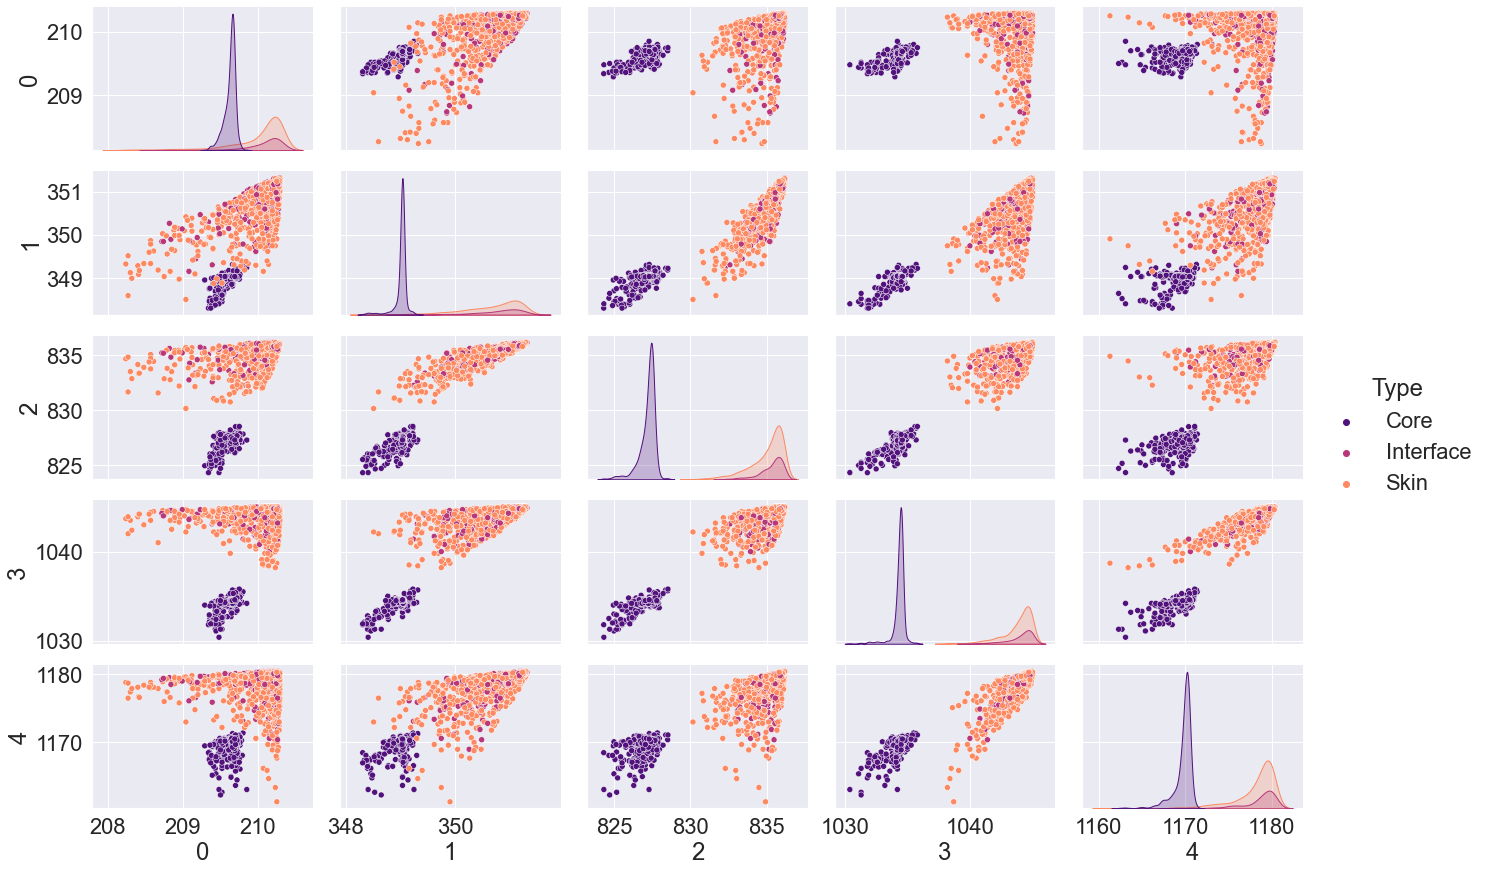

In [10]:
sns.set(font_scale=2)
pair_grid = sns.pairplot(data = freq_plot, hue = 'Type', aspect = 1.5, 
                         palette="magma")

In [11]:
pair_grid.savefig('Damage_classification.jpg')

## Pycaret setup

In [16]:
from pycaret.classification import *

exp_mclf101 = setup(data = data, target = 'Type', session_id=1, fix_imbalance = True) 

,Description,Value
0,session_id,1
1,Target,Type
2,Target Type,Multiclass
3,Label Encoded,"Core: 0, Interface: 1, Skin: 2"
4,Original Data,"(1651, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Model Comparision

In [18]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8502,0.9485,0.7487,0.8502,0.8473,0.7524,0.7552,0.0670
rf,Random Forest Classifier,0.8381,0.9468,0.7389,0.8407,0.8385,0.7337,0.7347,0.2110
et,Extra Trees Classifier,0.8347,0.9492,0.7317,0.8381,0.8344,0.7282,0.7302,0.2140
dt,Decision Tree Classifier,0.8277,0.8814,0.7416,0.8416,0.8329,0.7201,0.7220,0.0090
gbc,Gradient Boosting Classifier,0.8208,0.9439,0.7278,0.8338,0.8254,0.7084,0.7104,0.1770
knn,K Neighbors Classifier,0.7652,0.9178,0.7013,0.8180,0.7801,0.6313,0.6438,0.0570
lda,Linear Discriminant Analysis,0.7316,0.9311,0.7084,0.8255,0.7474,0.5910,0.6221,0.0080
ada,Ada Boost Classifier,0.7292,0.9297,0.6773,0.8174,0.6915,0.5937,0.6568,0.0420
lr,Logistic Regression,0.7273,0.9294,0.6937,0.8157,0.7434,0.5829,0.6112,0.6920
qda,Quadratic Discriminant Analysis,0.7247,0.9489,0.7388,0.8540,0.7330,0.5895,0.6405,0.0090


## Tuning selected models

### Light Gradient Boosting Machine

In [19]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8448,0.9521,0.7624,0.8513,0.8477,0.7467,0.7471
1,0.8879,0.9669,0.7979,0.8821,0.8839,0.8136,0.8145
2,0.8621,0.9386,0.7216,0.8426,0.8445,0.7661,0.7729
3,0.8190,0.9392,0.6999,0.8152,0.8170,0.7011,0.7012
4,0.8448,0.9358,0.7212,0.8322,0.8369,0.7409,0.7425
5,0.8696,0.9469,0.7574,0.8612,0.8643,0.7813,0.7822
6,0.8348,0.9573,0.8222,0.8897,0.8468,0.7405,0.7561
7,0.8348,0.9593,0.7000,0.8230,0.8281,0.7232,0.7241
8,0.8522,0.9460,0.7444,0.8488,0.8504,0.7544,0.7545


In [20]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
tuned_lightgbm, tuner = tune_model(lightgbm, search_library = 'tune-sklearn', 
                                   n_iter = 100, choose_better=True, 
                                   search_algorithm = 'hyperopt', early_stopping = 'asha', 
                                   return_tuner = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8534,0.9497,0.7695,0.8565,0.8549,0.7599,0.7600
1,0.8793,0.9652,0.7908,0.8747,0.8765,0.8000,0.8004
2,0.8707,0.9343,0.7287,0.8541,0.8510,0.7798,0.7887
3,0.8448,0.9386,0.7212,0.8322,0.8369,0.7409,0.7425
4,0.8621,0.9396,0.7491,0.8516,0.8550,0.7697,0.7713
5,0.8609,0.9450,0.7504,0.8547,0.8573,0.7676,0.7680
6,0.8522,0.9582,0.8208,0.8865,0.8616,0.7641,0.7720
7,0.8609,0.9523,0.7361,0.8486,0.8529,0.7659,0.7676
8,0.8435,0.9484,0.7375,0.8435,0.8435,0.7410,0.7410


In [22]:
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.8391213301616957, bagging_freq=4,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.7678677477927117, importance_type='split',
               learning_rate=0.20653852599387687, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001,
               min_split_gain=0.0019127143162361304, n_estimators=90, n_jobs=-1,
               num_leaves=154, objective=None, random_state=1,
               reg_alpha=0.00019386436177038942,
               reg_lambda=3.73160623067188e-09, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [47]:
dam_wn = np.array(([244, 471, 1181, 1681, 2318], [246, 478, 1190, 1694, 2328], 
          [241, 461, 1163, 1676, 2297], [235, 460, 1160, 1680, 2294], [246, 479, 1175, 1685, 2317]))

dam_wn = pd.DataFrame(dam_wn)

In [72]:
tuned_lightgbm.predict(dam_wn)

array([2, 2, 2, 2, 2])

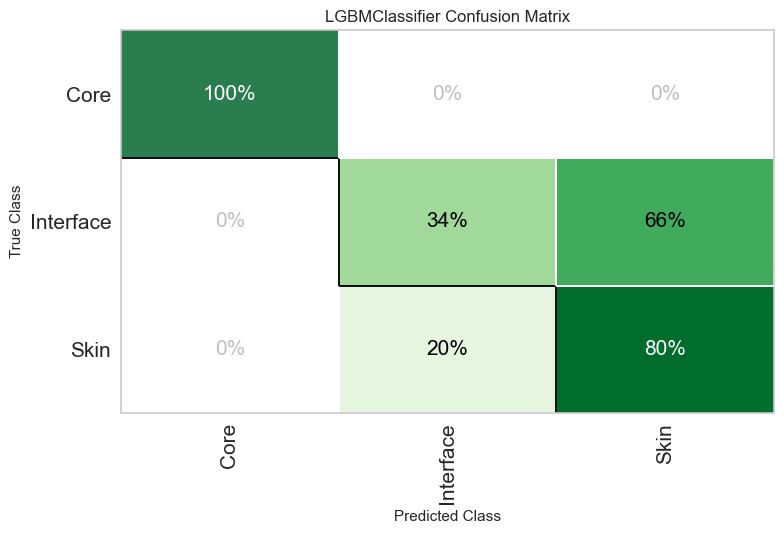

In [23]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [ ]:
plot_model(tuned_lightgbm, plot = 'class_report')

In [ ]:
plot_model(tuned_lightgbm, plot='boundary', scale = 1.0)

In [ ]:
plot_model(tuned_lightgbm, plot = 'feature')

In [ ]:
plot_model(tuned_lightgbm, plot = 'pr')

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

### Quadratic Discriminant Analysis

In [ ]:
qda = create_model('qda')

In [ ]:
print(qda)

In [ ]:
tuned_qda = tune_model(qda, n_iter = 100)

In [ ]:
print(tuned_qda)

In [ ]:
plot_model(tuned_qda, plot = 'confusion_matrix')

In [ ]:
plot_model(tuned_qda, plot = 'class_report')

In [ ]:
plot_model(tuned_qda, plot='boundary')

In [ ]:
plot_model(tuned_qda, plot = 'error')

### Ada Boost Classifier

In [ ]:
ada = create_model('ada')

In [ ]:
print(ada)

In [ ]:
tuned_ada = tune_model(ada)

In [ ]:
print(tuned_ada)

In [ ]:
plot_model(tuned_ada, plot = 'confusion_matrix')

In [ ]:
plot_model(tuned_ada, plot = 'class_report')

In [ ]:
plot_model(tuned_ada, plot='boundary')

In [ ]:
plot_model(tuned_ada, plot = 'error')

In [ ]:
plot_model(tuned_ada, plot = 'pr')

### Extra Trees Classifier

In [ ]:
et = create_model('et')

In [ ]:
print(et)

In [ ]:
tuned_et = tune_model(et)

In [ ]:
print(tuned_et)

In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [ ]:
plot_model(tuned_et, plot = 'class_report')

In [ ]:
plot_model(tuned_et, plot='boundary')

In [ ]:
plot_model(tuned_et, plot = 'error')

In [ ]:
plot_model(tuned_et, plot = 'feature')